In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation,BatchNormalization
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
#Matplotlib relies on the Pillow library to load image data.

# import the opencv library
import cv2


In [2]:
# Load age model
model2 = keras.models.load_model('AgeModel/untitled_age_94.h5')

Import Gender model

In [3]:
model1 = keras.models.load_model('GenderModel/gender_sgd_val_89_ac_96.h5')

Capturing video image

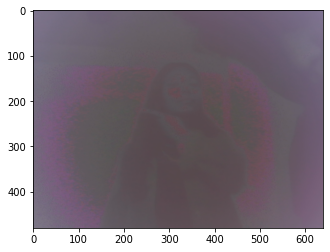

In [11]:
camera = cv2.VideoCapture(0)
for i in range(1):
    return_value, img = camera.read()
    cv2.imwrite('opencv'+str(i)+'.jpg', img)
camera.release()

plt.imshow(img)
plt.show()

image loading and checking

[[0.4420283]]
male
age-group :0-10


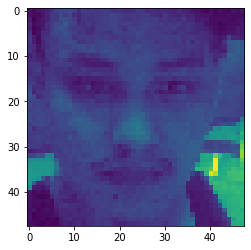

In [5]:
sample_image = cv2.imread('opencv1.jpg')
plt.imshow(sample_image)
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml').detectMultiScale(sample_image,1.2,4)

for (x,y,w,h) in faces:
    cv2.rectangle(sample_image,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = sample_image[y:y+w,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    image_pixels = img_to_array(roi_gray)
    image_pixels = np.expand_dims(image_pixels,axis=0)
    image_pixels /=255
   
    predictions = model1.predict(image_pixels)
    print(predictions)
    if predictions[0][0]<=0.5:
        print('male')
    else:
        print('female')
    plt.imshow(roi_gray)

    predictions2 = model2.predict(image_pixels)
    predictions2 = np.argmax([predictions2])
    age_group = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>110']
    
    print('age-group :' + age_group[predictions2]) 

face detection using webcam
 

In [6]:
# faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# video_capture = cv2.VideoCapture(0)
# while True:
#     # Capture frame-by-frame
#     ret, frame = video_capture.read()
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = faceCascade.detectMultiScale(gray,
#                                          scaleFactor=1.1,
#                                          minNeighbors=5,
#                                          minSize=(60, 60),
#                                          flags=cv2.CASCADE_SCALE_IMAGE)
        
#     for (x,y,w,h) in faces:
#         roi_gray = frame[y:y+w,x:x+h]
#         roi_gray = cv2.resize(roi_gray,(48,48))
#         image_pixels = img_to_array(roi_gray)
#         image_pixels = np.expand_dims(image_pixels,axis=0)
#         image_pixels /=255

#         predictions = model1.predict(image_pixels) 
#         if predictions[0][0]<=0.5:
#             g ='gender : male ' + str(predictions)
#         else:
#             g = 'gender : female ' + str(predictions)


#         predictions2 = model2.predict(image_pixels)
#         predictions2 = np.argmax([predictions2])
#         age_group = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>110']
#         a = 'age-group : '+ str(age_group[predictions2])
        
#         cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)
        
#         #Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
#         cv2.putText(frame, g, (x, y-30), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)
#         cv2.putText(frame, a, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)
    
#         # Display the resulting frame
#     cv2.imshow('Video', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# video_capture.release()
# cv2.destroyAllWindows()         

oldcodes

In [12]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)

        predictions2 = model2.predict(image_pixels)
        predictions2 = np.argmax([predictions2])
        age_group = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>110']
        a = 'age-group : '+ str(age_group[predictions2])
        cv2.putText(frame, a, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)    

        predictions = model1.predict(image_pixels)
        if predictions[0][0]<=0.5:
            g ='gender : male ' + str(predictions)
        else:
            g = 'gender : female ' + str(predictions)
        cv2.putText(frame, g, (x, y-30), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()  

old codes

loading and resizing dimension of image

In [32]:
# # Image.open() can also open other image types
# WIDTH = 48
# HEIGHT = 48 
# img = Image.open("opencv1.jpg")
# # WIDTH and HEIGHT are integers
# resized_img = img.resize((WIDTH, HEIGHT))
# resized_img.save("resized_image.jpg")

# #greyscale
# img_grey = resized_img.convert('L')
# #ploting image
# plt.imshow(resized_img)
# plt.show()
# plt.imshow(img_grey)
# plt.show()

Testing captured images 

In [38]:
# value=np.asarray(img) 
# print(type(value),value)
# print(value.shape)

<class 'numpy.ndarray'> [[22 21 21 ... 24 21 21]
 [23 19 21 ... 28 21 23]
 [26 18 19 ... 29 23 17]
 ...
 [25 21 23 ... 26 23 24]
 [25 21 23 ... 28 25 26]
 [27 24 24 ... 32 25 24]]
(48, 48)


In [37]:
# value = value.flatten()
# print(value)



[22 21 21 ... 32 25 24]


In [50]:
# gender predict
# image_pixels = img_to_array(image)
# print(image_pixels)

# image_pixels = np.expand_dims(image_pixels,axis=0)
# gend = model1.predict(image_pixels)
# print(gend)
# if gend[0][0] <=0.5:
#     print('male')
# else:
#     print('female')

# gender predict
# image_pixels = img_to_array(X_test[ii])
# image_pixels = np.expand_dims(image_pixels,axis=0)
# aged = model1.predict(image_pixels)
# print(aged)
# aged = np.argmax(aged)
# print(aged,'-index')
# age_group = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>110']
# print('age group: ',age_group[aged])

[[[240. 233. 239.]
  [240. 233. 239.]
  [240. 233. 239.]
  ...
  [125. 118. 126.]
  [135. 127. 139.]
  [136. 128. 140.]]

 [[240. 233. 239.]
  [240. 233. 239.]
  [240. 233. 239.]
  ...
  [131. 124. 132.]
  [132. 124. 136.]
  [132. 124. 136.]]

 [[240. 234. 238.]
  [240. 234. 238.]
  [240. 234. 238.]
  ...
  [137. 134. 138.]
  [132. 132. 136.]
  [141. 141. 145.]]

 ...

 [[ 67.  63.  65.]
  [ 67.  63.  66.]
  [ 67.  63.  67.]
  ...
  [ 70. 103. 138.]
  [ 79. 114. 153.]
  [ 95. 130. 169.]]

 [[ 60.  64.  65.]
  [ 63.  64.  66.]
  [ 68.  64.  68.]
  ...
  [ 65. 105. 119.]
  [ 74. 117. 131.]
  [ 84. 127. 141.]]

 [[ 59.  53.  57.]
  [ 62.  56.  60.]
  [ 63.  57.  61.]
  ...
  [ 64. 106. 117.]
  [ 69. 115. 116.]
  [ 76. 122. 123.]]]
